#LATAR BELAKANG

Airbnb merupakan salah satu perusahaan pioner terdepan dalam menerapkan business dengan konsep Economy-Sharing pada property untuk akomodasi. Konsep ini mempertemukan pihak pemilik property baik entitas badan usaha ataupun perseorangan dengan pihak penyewa yang membutuhkan layanan akomodasi tersebut. Salah satu kota yang menjadi coverage layanan airbnb adalah kota Bangkok, Thailand.

Berdasarkan dataset Airbnb Bangkok by samuelsemaya, listing yang terdaftar pada sistem airbnb berjumlah 15.800+ per Desember 2022.

##Pernyataan Masalah

Airbnb ingin mengetahui listing mana saja yang cenderung disukai dan kurang atau tidak disukai tamu (Guest) di Bangkok berdasarkan data historis. Informasi ini akan membantu dalam memahami Customer Needs dan meningkatkan kualitas layanan, yang pada akhirnya dapat meningkatkan pendapatan.

Pertanyaan dari masalah ini adalah:
Bagaimana karakteristik listing Airbnb yang cenderung disukai tamu (guest) jika dibandingkan dengan listing Airbnb yang kurang atau tidak disukai di kota Bangkok?

#DATA

##Import Dataset dan Libraries

In [130]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler #Untuk scalling paramter pembentuk enjoyment_score

In [131]:
#Import Dataset
airbnb = pd.read_csv('/content/Airbnb Listings Bangkok.csv')

In [132]:
#Menghilangkan kolom tidak terpakai
airbnb.drop(columns =['Unnamed: 0'], inplace=True )

In [133]:
#Lihat data sekilas
airbnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Data Understanding and Cleansing

In [134]:
#Pengenalan Dataset - Summary Structure
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

Glosarium Column Dataset:
1. id : Airbnb's unique identifier for the listing.
1. name : Name of the listing.
1. host_id : Airbnb's unique identifier for the host/user.
1. host_name : Name of the host. Usually, just the first name(s).
1. neighborhood : The neighborhood is geocoded using the latitude and
longitude against neighborhoods as defined by open or public
digital shapefiles.
1. latitude : Uses the World Geodetic System (WGS84) projection for latitude and longitude.
1. longitude : Uses the World Geodetic System (WGS84) projection for latitude and longitude.
1. room_type : Entire home/apt, Private room, Shared room, and Hotel.
1. price : Daily price in local currency. Note, the $ sign may be used despite the locale.
1. minimum_nights : The minimum number of night stays for the listing (calendar rules may differ).
1. number_of_reviews : The number of reviews the listing has.
1. last_review : The date of the last/newest review.
1. calculated_host_listings_count : The number of listings the host has in the current scrape in the city/region geography.
1. availability_365 : avaliability_x. The calendar determines the availability of the
1. listing x days in the future : Note a listing may be available because it has been booked by a guest or blocked by the host.
1. number_of_reviews_ltm : The number of reviews the listing has (in the last 12 months).

In [135]:
#Pengenalan Dataset - Summary Stats I
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [136]:
#Pengenalan Dataset - Summary Stats II
airbnb.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [137]:
#Cek duplikat data berdasarkan Primary key (kolom= 'id')
airbnb['id'].value_counts().head(5)

,count
id,
27934,1
42467547,1
42469079,1
42629775,1
42469110,1


Berdasarkan value 'id' sebagai primary key pada dataset ini, dapat kita simpulkan bahwa tidak ada data yang duplikat.

###Missing Value

In [138]:
airbnb.isna().sum()

,0
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


Terdapat missing value (NaN) pada beberapa kolom di datasebut sebagai berikut:
1. Name = 8 data
1. Host_name = 1 data
1. last_review = 5790 data
1. reviews_per_month = 5790 data


####Missing Value - `host_name`

In [139]:
#Mengecek data NaN di Name
airbnb[airbnb['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Host pemilik Listing dengan ID 137488762 baru pertama kali mendaftarkan, hal itu didasarkan pada data pada 'calculated_host_listings_count' yang bernilai 1. Langkah yang bisa kita lakukan adalah dengan mengisi nilai Null tersebut dengan 'Anon'.

In [140]:
#Imputation data NaN 'host_name' dengan 'Anon'
airbnb['host_name'].fillna('Anon', inplace=True)

<ipython-input-140-756cdadebde9>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





####Missing Value - `name`

In [141]:
#Mengecek data NaN di name
airbnb[airbnb['name'].isnull()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Berdasarkan 'calculated_host_listings_count', data dengan nilai NaN pada kolom 'name' terdiri dari 2 type:
1. 7 data = pemilik hanya memiliki 1 listing atau bisa dikatakan data tersebut merupakan listing perdana mereka di airbnb
1. 1 data (id 13142743) = pemilik mempunyai total listing sebanyak 3 unit.

Action : Pada type 1 akan kita imputasi dengan nilai "Others". Sedangkan type 2 akan mengikuti pola 2 listing lain milik hosting yang sama.

In [142]:
#Imputation data NaN 'name' type I dengan 'Others'
airbnb.loc[airbnb['id'] != 13142743, 'name'] = airbnb.loc[airbnb['id'] != 13142743, 'name'].fillna('Others')

In [143]:
#Breakdown data NaN 'name' type II (id= 13142743) dengan approach based on host_id-nya
airbnb[airbnb['host_id'] == 73275200]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Berdasarkan 2 listing lain milik host bernama Pakaphol, pola penamaan listingnya dibuat dengan 'name' yang sama. Hal itu menjadi alasan kita untuk melakukan imputasi 'name' listing bernomor 'id' = 13142743 dengan nama yang sama yaitu 'Errday Guest House'.

In [144]:
#Imputation data NaN 'name' type II dengan 'Errday Guest House'
airbnb.loc[airbnb['id'] == 13142743, 'name'] = "Errday Guest House"

####Missing Value - `last_review* and *reviews_per_month`

Jumlah missing value pada 2 kolom tersebut yaitu 5790 dari total data pada dataset sebanyak 15.854 atau dalam persentase senilai 36,52%.

In [145]:
#Mengecek data NaN di name
nan_lastreview = airbnb[airbnb['last_review'].isnull()]

nan_lastreview.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


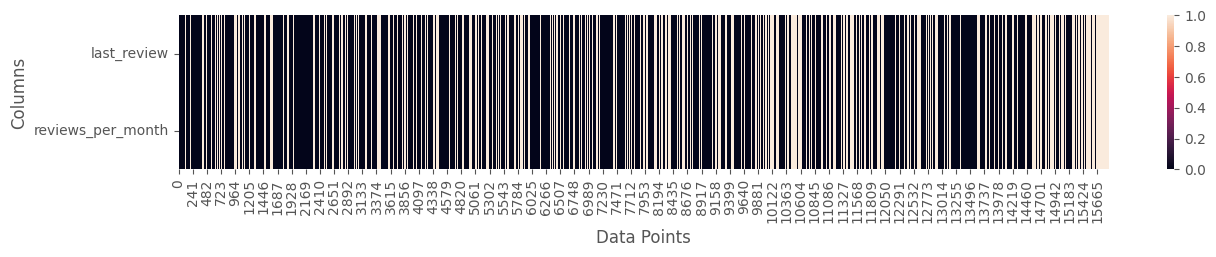

In [146]:
#Distribusi data null pada 'last_review' dan 'reviews_per_month'
plt.figure(figsize=(15,2))
sns.heatmap(airbnb[['last_review','reviews_per_month']].isna().T)
plt.xlabel('Data Points')  # Label untuk sumbu x
plt.ylabel('Columns')  # Label untuk sumbu y
plt.show()

In [147]:
#Data unique 'number_of_reviews' dan 'number_of_reviews_ltm' saat "lastreview" = NaN
kolom_dicek = ['number_of_reviews', 'number_of_reviews_ltm']
list_unique = []

for i in kolom_dicek:
    list_unique.append(nan_lastreview[i].value_counts())

# Tampilkan Hasil cek data unique
result_cek = pd.DataFrame(list_unique, index=kolom_dicek)
result_cek

,0
number_of_reviews,5790
number_of_reviews_ltm,5790


In [148]:
airbnb['number_of_reviews'].value_counts().head(3)

,count
number_of_reviews,
0,5790
1,1737
2,948


Berdasarkan pengecekan data diatas menunjukkan bahwasanya:

*   Value pada 'last_review' dan 'reviews_per_month' akan kosong (NaN) pada data yang sama 100%.
*   Ketika 2 kolom tersebut bernilai NaN, value pada 'number_of_reviews' dan 'number_of_reviews_ltm' akan bernilai "0". Korelasi tersebut akan berlaku dua arah 100% pada 'number_of_reviews', sedangkan 'number_of_reviews_ltm' tidak.

2 temuan tersebut menjadi kesimpulan bahwa semua data NaN pada 2 diatas murni 100% karena belum ada customer yang memberikan review.

Hal tersebut menjadi dasar kita untuk melakukan imputation berikut:
1. 'reviews_per_month': NaN kita ubah menjadi nilai "0".
2. 'last_review': NaN kita ubah menjadi suatu nilai baru yaitu 01-01-2000, agar saat kita mengolah data berdasarkan kolom ini, listing yang belum direview dapat kita filter.

In [149]:
#Imputation NaN 'reviews_per_month'
airbnb['reviews_per_month'].fillna(0.0, inplace=True)

<ipython-input-149-144a05522dca>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [150]:
#Imputation NaN 'last_review'
airbnb['last_review'].fillna('2000-01-01', inplace=True)

<ipython-input-150-6e94ddeb9552>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





###Formatting

In [151]:
#Cek Overall format data pada setiap kolom
lihat_unique = []

for i in airbnb.columns :
    lihat_unique.append( [i, airbnb[i].nunique(), airbnb[i].unique(), airbnb[i].dtype])

tabel_lihat = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample','Dtype'],
                     data=lihat_unique)
tabel_lihat

,Column Name,Number of Unique,Unique Sample,Dtype
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ...",int64
1,name,14795,"[Nice room with superb city view, Easy going l...",object
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296...",int64
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo...",object
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B...",object
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76...",float64
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1...",float64
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh...",object
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,...",int64
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1...",int64


###Spliting Data

Dataset *Airbnb* akan dibagi kedalam 4 kategori berdasarkan room type,yaitu:
1. Entire home/Apartement
1. Private room
1. Hotel room
1. Shared room

Setiap type memberikan fasilitas yang berbeda sehingga diasumsikan akan ada kecenderungan perbedaan dalam segi harga dan minimum nights.

In [152]:
airbnb['room_type'].value_counts()

,count
room_type,
Entire home/apt,8912
Private room,5770
Hotel room,649
Shared room,523


In [153]:
#room_type = Entire home/apartement
home = airbnb[airbnb['room_type'] == 'Entire home/apt']

#Print
home

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.697570,100.528800,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,2000-01-01,0.00,1,365,0
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.816930,100.564330,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0
11,1765918,2BR apt in a cozy neighborhood,9279712,Jing,Phaya Thai,13.774860,100.542720,Entire home/apt,1893,15,129,2022-09-30,1.17,1,356,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,790119442153528940,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Kotcharat,Bang Sue,13.829630,100.527890,Entire home/apt,560,12,0,2000-01-01,0.00,8,302,0
15834,790302368904551572,SuperHost Studio Sukhumvit BTS Nana 5min 200M ...,6379413,Rekha,Khlong Toei,13.737380,100.554180,Entire home/apt,2271,1,0,2000-01-01,0.00,3,344,0
15835,790329192709152199,*Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...,294345312,Durian,Huai Khwang,13.790493,100.575049,Entire home/apt,1442,2,0,2000-01-01,0.00,4,90,0
15839,790404714116491557,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,13.763732,100.569455,Entire home/apt,2100,28,0,2000-01-01,0.00,2,332,0


In [154]:
#room_type = Private room
private = airbnb[airbnb['room_type'] == 'Private room']

#Print
private

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,2000-01-01,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,2000-01-01,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,2000-01-01,0.00,3,365,0
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.685560,100.495350,Private room,1558,3,1,2014-02-03,0.01,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,2000-01-01,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,2000-01-01,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,2000-01-01,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,2000-01-01,0.00,14,365,0


In [155]:
#room_type = Hotel room
hotel = airbnb[airbnb['room_type'] == 'Hotel room']

#Print
hotel

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12,55686,Comfy bedroom near River pier & BTS Taksin.,263049,Tor,Sathon,13.71802,100.51539,Hotel room,1862,2,208,2019-12-02,1.44,7,361,0
98,439051,Luxury Riverview Teakwood Apartment-Great View...,2122791,Maam & Hermann,Yan na wa,13.67317,100.54406,Hotel room,1558,2,120,2020-02-28,0.93,1,361,0
367,3772295,"*Kingsize Boutique Room* 10min to Skytrain, WiFi",19266319,Alex,Vadhana,13.73053,100.59591,Hotel room,859,1,35,2022-11-23,0.40,36,349,2
378,2960283,"Triple room,Near Grand Palace",14391623,Sasi,Phra Nakhon,13.74770,100.49783,Hotel room,3910,1,10,2022-12-07,0.10,24,347,2
388,3813738,Private Kingsize bed 10mins to SkyTrain free BF,19266319,Alex,Vadhana,13.73256,100.59577,Hotel room,650,1,24,2017-07-10,0.26,36,349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,38707233,1BR Suite with Balcony for 3 Adults - Asok Sta...,98598351,Admiral Premier,Vadhana,13.73820,100.56464,Hotel room,4000,1,0,2000-01-01,0.00,17,363,0
9124,39042591,Amber Deluxe RO Great Location-2 Steps BTS NANA,378180502,Panitchaya,Khlong Toei,13.74007,100.55582,Hotel room,4099,1,1,2019-12-24,0.03,22,359,0
9128,39061408,Amber Deluxe RB Great Location-2 Steps BTS NANA,378180502,Panitchaya,Khlong Toei,13.74007,100.55582,Hotel room,9999,1,0,2000-01-01,0.00,22,0,0
9145,39095982,Super Comfy Capsule Bed in Female Dorm | Sukhu...,126601726,Patsiri,Khlong Toei,13.72712,100.57305,Hotel room,350,1,1,2020-03-01,0.03,15,361,0


In [156]:
#room_type = Shared room
shared = airbnb[airbnb['room_type'] == 'Shared room']

#Print
shared

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
68,1060320,Mix Dorm Decor do Hostel,5171292,Somsak,Khlong San,13.722140,100.50752,Shared room,350,1,12,2020-02-08,0.12,10,87,0
79,1086843,Near Bangkok more space than urban!,4937984,Sugarcane,Phra Nakhon,13.751350,100.49447,Shared room,5195,1,0,2000-01-01,0.00,1,365,0
85,1961981,S1 hostel (Dorm) Sathorn Bangkok,10138065,S1,Sathon,13.721570,100.54509,Shared room,330,1,82,2019-12-09,0.83,3,358,0
113,2067731,BANGKOK HUB : Standard Double Room,8664261,Kriengkrai,Sathon,13.716620,100.51572,Shared room,866,1,2,2019-01-01,0.03,7,365,0
262,1515778,"Bangkok near BTS Cosy Room Wifi, host take care",8093424,Tesue,Vadhana,13.709920,100.59918,Shared room,712,2,1,2018-08-01,0.02,1,355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15824,790251685685460492,3 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,1365,1,0,2000-01-01,0.00,14,365,0
15825,790254404359398158,2 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,910,1,0,2000-01-01,0.00,14,365,0
15826,790259260349098761,4 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,1821,1,0,2000-01-01,0.00,14,365,0
15827,790264226712277949,5 Beds in Mix Dormitory Room,340188343,Rachan,Vadhana,13.740168,100.55632,Shared room,2276,1,0,2000-01-01,0.00,14,365,0


###Outliers
>Data yang akan diperiksa nilai outliernya adalah 'price' dan 'minimum_nights'.
Tahapannya dimulai dengan pengecekan outliers secara visual-statistik. Data yang diduga outliers secara visual-statistik akan dianalisa lebih dalam secara context.

In [157]:
# import plotly express as px
import plotly.express as px

####Outlier - `Home/Apt`

#####Home - `Minimum Nights`

In [158]:
#Home - Scatter Plot minimum_nights vs price
px.scatter(home, x='minimum_nights', y='price', width=600, height=400)

In [159]:
#Minimum Nights - Boxplot
px.box(home, x='minimum_nights', title='Minimum Nights', width=10000, height=250)

In [160]:
# Menghitung Q1, Q2, dan IQR dari minimum_nights pada Home room
Q1 = home['minimum_nights'].quantile(0.25)
Q3 = home['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = home['minimum_nights'].median()

print('Max Value dari minimum_nights pada type Entire home yaitu', max_value,'hari')

Max Value dari minimum_nights pada type Entire home yaitu 66.0 hari


In [161]:
#Minimum Nights - Histogram untuk breakdown data outliers (>66)
px.histogram(
    home,
    x=[home[home['minimum_nights'] > 66]['minimum_nights']],
    nbins=100,
)

In [162]:
#Minimum Nights - Breakdown data outliers minimum nights > 140
home[home['minimum_nights'] > 140]['number_of_reviews'].value_counts().head(10)

,count
number_of_reviews,
0,146
2,26
1,17
3,8
7,7
4,7
6,6
9,5
35,3


In [163]:
#Jumlah outliers
home[(home['minimum_nights'] > 66)].shape

(518, 16)

In [164]:
#Minimum Nights - Jumlah Outliers
outliers_home1 = home[(home['minimum_nights'] > 66) & (home['minimum_nights'] <= 140)]
print("Data outliers pada range 66-140 berjumlah", outliers_home1.shape[0], "data dan >140 berjumlah", home[home['minimum_nights'] > 140].shape[0], "data")

Data outliers pada range 66-140 berjumlah 231 data dan >140 berjumlah 287 data


**Room type : Entire Home/Apt - Minimum Nights**

Beberapa poin terkait data outliers (*minimum_nights* > 66 hari), yaitu:
1. Outliers pada data 'minimum_nights' dengan type room 'Entire Home/Apt' berjumlah 518 atau 5,81% dari total data 8912.
1. Distribusi data outlier terkonsentrasi pada 3 titik yaitu:
  - range 80-140 : 231 data
  - range 180-219 : 134 data
  - range 300-379 : 140 data
1. Airbnb tidak mempunyai rules batas atas terkait 'minimum_nights' sehingga menjadi hak prerogatif host*.
1. *Type_room* entire home/apartement diasumsikan bisa disewa berbulan-bulan dengan target market tertentu a.k.a niche market*, sehingga kita asumsikan setidaknya 140 hari atau 5 bulan adalah batas outliers yang masih bisa diterima untuk type ini.
1. Jumlah data yang mempunyai nilai ['minimum_nights' > 140] berjumlah 287 row data dengan 146 (50,87%) diantaranya mempunyai nilai 'number_of_reviews'= 0 yang diasumsikan adalah listing baru, sehingga tidak mempengaruhi analisa data yang dilakukan nantinya.

*Sumber:
https://www.hostaway.com/blog/long-term-rental-airbnb-guests/

Action: Data outliers yang nilai *minimum_nights*-nya berada pada rentang 66 hari (garis max boxplot) hingga 140 hari tetap akan digunakan, namun untuk data dengan nilai > 140 akan dihapus.

In [165]:
#Action - Remove data dengan minimum_nights > 140 hari
home = home[home['minimum_nights'] <= 140]

In [166]:
#Recheck dataset
home['room_type'].value_counts()

,count
room_type,
Entire home/apt,8625


#####Home - `Price`

In [167]:
#Price - Boxplot
px.box(home, x='price', title='Price', width=1100, height=250)

In [168]:
# Menghitung Q1, Q2, dan IQR
Q1 = home['price'].quantile(0.25)
Q3 = home['price'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = home['price'].median()

print('Max Value dari price pada type Entire home yaitu', max_value,'THB') #Pembulatan keatas menjadi 4865 THB

Max Value dari price pada type Entire home yaitu 4864.5 THB


In [169]:
#Price - Histogram untuk breakdown data outliers (>4865)
px.histogram(
    home,
    x=[home[home['price'] > 4865]['price']],
    nbins=100,
)

In [170]:
#Sampling Outliers range 4865-40000
home[(home['price'] > 4865) & (home['price'] <= 40000)].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
7883,34922232,2BR！New! Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.714590,100.568320,Entire home/apt,5143,1,24,2022-09-25,0.55,228,362,9
1161,7708975,Modern Apartment near City Center,20296522,Teerapat,Pra Wet,13.673600,100.645940,Entire home/apt,5000,1,0,2000-01-01,0.00,1,365,0
8150,35363994,Cozy House City center BTS&MRT,67662233,Shatchawan,Khlong Toei,13.719342,100.563165,Entire home/apt,5760,1,1,2022-12-15,1.00,1,355,1
420,4526250,Luxury Apt Heart of Bkk Sukh soi 10,23464259,Jean-Michel,Khlong Toei,13.721380,100.582360,Entire home/apt,15000,1,1,2014-11-20,0.01,1,365,0
3344,17973429,Spacious apartmentsX4 Silom 3(Free airport pic...,26736483,K,Bang Rak,13.726990,100.529900,Entire home/apt,7117,1,1,2018-09-08,0.02,89,176,0


In [171]:
#Jumlah Total outliers (>4865)
home[(home['price'] >= 4865)].shape

(751, 16)

In [172]:
#Jumlah Outliers per konsentrasi data
outliers_home2 = home[(home['price'] >= 4865) & (home['price'] <= 40000)]
print("Data outliers pada range 4865-40.000 THB berjumlah", outliers_home2.shape[0], "data dan >40.000 THB berjumlah", home[home['price'] > 40000].shape[0], "data")

Data outliers pada range 4865-40.000 THB berjumlah 722 data dan >40.000 THB berjumlah 29 data


**Room type : Entire Home/Apt - Price**

Beberapa poin terkait data outliers (*Price* > 4865), yaitu:
1. Outliers pada data 'price' dengan type room 'Entire Home/Apt' berjumlah 751 atau 8,71% dari total data 8625.
1. Distribusi data outlier bisa kita bagi pada 2 bagian besar yaitu:
  - range 4865-40000 THB : 722 data
  - diatas 40000 THB : 29 data

Action: Data outliers yang nilai *price*-nya berada pada rentang 4865 THB (garis max boxplot) hingga 40000 THB tetap akan digunakan, sedangkan data dengan nilai > 40000 THB akan dihapus.

In [173]:
#Action - Remove data dengan price > 40.000 THB
home = home[home['price'] <= 40000]

In [174]:
#Recheck dataset
home['room_type'].value_counts()

,count
room_type,
Entire home/apt,8596


####Outlier - `Private Room`

#####Private - `Minimum Nights`

In [175]:
#Private - Scatter Plot minimum_nights vs price
px.scatter(private, x='minimum_nights', y='price', width=800, height=600)

In [176]:
#Minimum Nights - Boxplot
px.box(private, x='minimum_nights', title='Minimum Nights', width=1100, height=250)

In [177]:
# Menghitung Q1, Q2, dan IQR
Q1 = private['minimum_nights'].quantile(0.25)
Q3 = private['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = private['minimum_nights'].median()

print('Max Value dari minimum_nights pada type Private room yaitu', max_value,'Hari') #Pembulatan keatas menjadi 4 hari

Max Value dari minimum_nights pada type Private room yaitu 3.5 Hari


In [178]:
#Minimum Nights - Distribusi data outliers (>4 hari)
px.histogram(
    private,
    x=[private[private['minimum_nights'] > 4]['minimum_nights']],
    nbins=100
)

In [179]:
#Minimum Nights - Jumlah Outliers
outliers_private1 = private[(private['minimum_nights'] > 4) & (private['minimum_nights'] <= 60)]
print("Data outliers pada range 4-60 berjumlah", outliers_private1.shape[0], "data dan >60 berjumlah", private[private['minimum_nights'] > 60].shape[0], "data")

Data outliers pada range 4-60 berjumlah 809 data dan >60 berjumlah 144 data


In [180]:
#Minimum Nights - Data outliers > 60 hari
private[private['minimum_nights'] > 60]['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,108
1,13
2,4
3,4
7,3
5,2
15,1
17,1
8,1


**Room type : Private Rome - Kolom : Minimum Nights**

Beberapa poin terkait data outliers (*minimum_nights* > 3.5 hari), yaitu:
1. Outliers pada data 'minimum_nights' dengan type room 'Private room' berjumlah 953 atau 16,82% dari total data 5667. Outliers tersebut terdiri dari:
   - range 4 hingga 60 : 809 data (84,89% dari total Outliers)
   - Lebih dari 60 : 144 data (15,11% dari total Outliers)
1. *Type_room* private di airbnb bisa disewa secara longterm pada segmen tertentu (niche market)*, namun diasumsikan tidak lebih lama dari type Entire Home/Apt yang punya fasilitas dan keleluasaan lebih bagi guest.
1. Jumlah data yang mempunyai nilai ['minimum_nights' > 60] berjumlah 144 row data dengan 108 (75%) diantaranya mempunyai nilai 'number_of_reviews'= 0 yang diasumsikan sebagai listing baru, sehingga tidak mempengaruhi analisa data yang dilakukan nantinya.

*Sumber: https://www.hostaway.com/blog/long-term-rental-airbnb-guests/

Action: Data outliers yang nilai *minimum_nights*-nya berada pada rentang 4 hari (garis max boxplot) hingga 60 hari tetap akan digunakan, namun untuk data dengan nilai > 60 hari akan dihapus.

In [181]:
#Action - Remove data dengan minimum_nights > 60 hari
private = private[private['minimum_nights'] <= 60]

In [182]:
#Recheck dataset
private['room_type'].value_counts()

,count
room_type,
Private room,5626


#####Private - `Price`

In [183]:
#Price - Boxplot
px.box(private, x='price', title='Price', width=12000, height=250)

In [184]:
# Menghitung Q1, Q2, dan IQR
Q1 = private['price'].quantile(0.25)
Q3 = private['price'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = private['price'].median()

print('Max Value dari price pada type Private room yaitu', max_value,'THB')

Max Value dari price pada type Private room yaitu 4050.0 THB


In [185]:
#Price - Histogram untuk breakdown data outliers (>4050)
px.histogram(
    private,
    x=[private[private['price'] > 4050]['price']],
    nbins=50,
)

In [186]:
#Sampling Outliers range 4050-40000
private[(private['price'] > 4050) & (private['price'] <= 40000)].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5124,25984958,"Studio,5min walk Skytrain Asoke,WiFi,Terminal21",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73236,100.56338,Private room,4871,1,1,2019-01-06,0.02,12,364,0
7205,32925750,Craftsman Bangkok Three bedrooms,196741252,Piyanit,Phaya Thai,13.78734,100.54605,Private room,5776,1,3,2020-01-24,0.07,9,0,0
13295,661330994674781348,Grand Suite- RO Modern Suite with Balcony,98598351,Admiral Premier,Vadhana,13.72517,100.57874,Private room,7015,1,0,2000-01-01,0.00,17,360,0
7758,34605627,Condo​ for rent​,260712432,Hubstep004,Bang Khae,13.71351,100.40550,Private room,12000,1,0,2000-01-01,0.00,1,358,0
5744,28503174,scc residence,109989043,Saran,Vadhana,13.73930,100.56711,Private room,38000,30,0,2000-01-01,0.00,1,365,0


In [187]:
#Jumlah Total outliers (>4050)
private[(private['price'] > 4050)].shape

(545, 16)

In [188]:
#Jumlah Outliers per konsentrasi data
outliers_private2 = private[(private['price'] > 4050) & (private['price'] <= 40000)]
print("Data outliers pada range 4050-40000 THB berjumlah", outliers_private2.shape[0], "data dan >40.000 THB berjumlah", private[private['price'] > 40000].shape[0], "data")

Data outliers pada range 4050-40000 THB berjumlah 517 data dan >40.000 THB berjumlah 28 data


**Room type : Private Room - Price**

Beberapa poin terkait data outliers (*Price* > 4050), yaitu:
1. Outliers pada data 'price' dengan type room 'Private_room' berjumlah 545 atau 9,69% dari total data 5626.
1. Distribusi data outlier bisa kita bagi pada 2 bagian besar yaitu:
  - range 4050-40000 THB : 517 data
  - diatas 40000 THB : 28 data

Action: Data outliers yang nilai *price*-nya berada pada rentang 4050 THB (garis max boxplot) hingga 40000 THB tetap akan digunakan, sedangkan data dengan nilai > 40000 THB akan dihapus.

In [189]:
#Action - Remove data dengan price > 40.000 THB
private = private[private['price'] <= 40000]

In [190]:
#Recheck dataset
private['room_type'].value_counts()

,count
room_type,
Private room,5598


####Outlier - `Hotel Room`

#####Hotel - `Minimum Nights`

In [191]:
#Hotel Room - Scatter Plot minimum_nights vs price
px.scatter(hotel, x='minimum_nights', y='price', width=800, height=600)

In [192]:
#Minimum Nights - Boxplot
px.box(hotel, x='minimum_nights', title='Minimum Nights', width=1100, height=250)

In [193]:
# Menghitung Q1, Q2, dan IQR
Q1 = hotel['minimum_nights'].quantile(0.25)
Q3 = hotel['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = private['minimum_nights'].median()

print('Max Value dari minimum_nights pada type Hotel room yaitu', max_value,'Hari')

Max Value dari minimum_nights pada type Hotel room yaitu 1.0 Hari


In [194]:
#Minimum Nights - Distribusi data outliers (>1 hari)
px.histogram(
    hotel,
    x=[hotel[hotel['minimum_nights'] > 1]['minimum_nights']],
    nbins=100
)

In [195]:
#Jumlah Total outliers (>1hari)
hotel[(hotel['minimum_nights'] > 1)].shape

(51, 16)

In [196]:
#Jumlah Outliers per konsentrasi data
outliers_hotel1 = hotel[(hotel['minimum_nights'] > 1) & (hotel['minimum_nights'] <= 7)]
print("Data outliers pada range 1-7 berjumlah", outliers_hotel1.shape[0], "data dan >7 berjumlah", hotel[hotel['minimum_nights'] > 7].shape[0], "data")

Data outliers pada range 1-7 berjumlah 37 data dan >7 berjumlah 14 data


**Room type : Hotel Room - Kolom : Minimum Nights**

Beberapa poin terkait data outliers (*minimum_nights* > 1), yaitu:
1. Outliers pada data 'minimum_nights' dengan type room 'Hotel Room' berjumlah 51 atau 7,88% dari total data 647.
1. Distribusi data outlier terbagi menjadi 2 bagian yaitu:
  - range 1-7 : 37 data
  - lebih dari 7 : 14 data
1. Airbnb tidak mempunyai rules batas atas terkait 'minimum_nights' sehingga menjadi hak prerogatif host.
1. *Type_room* hotel diasumsikan jarang atau hampir tidak pernah disewa berbulan-bulan layaknya entire home ataupun private room, sehingga kita asumsikan minimum_nights senilai 7 hari adalah batas outliers yang masih bisa diterima untuk type ini.

Action: Data outliers yang nilai *minimum_nights*-nya berada pada rentang 1 hari (garis max boxplot) hingga 7 hari tetap akan digunakan, namun untuk data dengan nilai > 7 akan dihapus.

In [197]:
# #Minimum Nights - Action update dataframe dengan menghilangkan data dengan value minimum_nights > 7 hari
hotel = hotel[hotel['minimum_nights'] <= 7]

In [198]:
#Recheck dataset
hotel['room_type'].value_counts()

,count
room_type,
Hotel room,635


#####Hotel - `Price`

In [199]:
#Price - Boxplot
px.box(hotel, x='price', title='Price', width=12000, height=250)

In [200]:
# Menghitung Q1, Q2, dan IQR
Q1 = hotel['price'].quantile(0.25)
Q3 = hotel['price'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = hotel['price'].median()

print('Max Value dari price pada type Hotel room yaitu', max_value,'THB') #Pembulatan keatas menjadi 6436 THB

Max Value dari price pada type Hotel room yaitu 6435.5 THB


In [201]:
#Price - Histogram untuk breakdown data outliers (>6436)
px.histogram(
    hotel,
    x=[hotel[hotel['price'] > 6436]['price']],
    nbins=50,
)

In [202]:
#Sampling Outliers range 6436-40000
private[(private['price'] > 6436) & (private['price'] <= 30000)].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5863,28590460,Deluxe Terrace - With Breakfast - Boulevard Ho...,215328104,Nutcha,Khlong Toei,13.74100,100.55322,Private room,10000,1,0,2000-01-01,0.00,21,365,0
8368,36761860,Duplex cozy Place resort style on Sukhumvit Line,267181587,Connie,Bang Na,13.67634,100.61033,Private room,15000,1,0,2000-01-01,0.00,9,30,0
10501,42422385,Boulevard Hotel Bangkok Deluxe - Room Only,215328104,Nutcha,Vadhana,13.73611,100.56977,Private room,7000,1,0,2000-01-01,0.00,21,365,0
13298,661356894786450135,Admiral Suite RB-NRF - 1BR Suite with Balcony,98598351,Admiral Premier,Khlong Toei,13.72449,100.57680,Private room,6943,1,0,2000-01-01,0.00,17,360,0
5950,29135949,La Citta Penthouse Thonglor 8,219556869,Chanya,Vadhana,13.73098,100.58264,Private room,8000,3,1,2019-12-21,0.03,1,90,0


In [203]:
#Jumlah Total outliers (>6436)
private[(private['price'] > 6436)].shape

(277, 16)

In [204]:
#Price - Jumlah Outliers
outliers_hotel2 = hotel[(hotel['price'] > 6436) & (hotel['price'] <= 30000)]
print("Data outliers pada range 6436-30000 THB berjumlah", outliers_hotel2.shape[0], "data dan >30000 THB berjumlah", hotel[hotel['price'] > 30000].shape[0], "data")

Data outliers pada range 6436-30000 THB berjumlah 46 data dan >30000 THB berjumlah 1 data


**Room type : Hotel Room - Price**

Beberapa poin terkait data outliers (*Price* > 6436), yaitu:
1. Outliers pada data 'price' dengan type room 'Private_room' berjumlah 47 atau 7,40% dari total data 635.
1. Distribusi data outlier bisa kita bagi pada 2 bagian besar yaitu:
  - range 6436-30000 THB : 46 data
  - diatas 30000 THB : 1 data

Action: Data outliers yang nilai *price*-nya berada pada rentang 6436 THB (garis max boxplot) hingga 30000 THB tetap akan digunakan, sedangkan data dengan nilai > 30000 THB akan dihapus.

In [205]:
#Action - Remove data dengan price > 30.000 THB
hotel = hotel[hotel['price'] <= 30000]

In [206]:
#Recheck dataset
hotel['room_type'].value_counts()

,count
room_type,
Hotel room,634


####Outlier - `Shared Room`

#####Shared - `Minimum Nights`

In [207]:
#Shared Room - Scatter Plot minimum_nights vs price
px.scatter(shared, x='minimum_nights', y='price', width=800, height=600)

In [208]:
#Minimum Nights - Boxplot
px.box(shared, x='minimum_nights', title='Minimum Nights', width=1100, height=250)

In [209]:
# Menghitung Q1, Q2, dan IQR
Q1 = shared['minimum_nights'].quantile(0.25)
Q3 = shared['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = shared['minimum_nights'].median()

print('Max Value dari minimum_nights pada type Shared room yaitu', max_value,'Hari')

Max Value dari minimum_nights pada type Shared room yaitu 1.0 Hari


In [210]:
#Minimum Nights - Distribusi data outliers (>1 hari)
px.histogram(
    shared,
    x=[shared[shared['minimum_nights'] > 1]['minimum_nights']],
    nbins=150
)

In [211]:
#Jumlah Total outliers (>1hari)
shared[(shared['minimum_nights'] > 1)].shape

(43, 16)

In [212]:
#Minimum Nights - Jumlah Outliers
outliers_shared1 = shared[(shared['minimum_nights'] > 1) & (shared['minimum_nights'] <= 7)]
print("Data outliers pada range 1-7 berjumlah", outliers_shared1.shape[0], "data dan >7 berjumlah", shared[shared['minimum_nights'] > 7].shape[0], "data")

Data outliers pada range 1-7 berjumlah 33 data dan >7 berjumlah 10 data


**Room type : Shared Room - Kolom : Minimum Nights**

Beberapa poin terkait data outliers (*minimum_nights* > 1), yaitu:
1. Outliers pada data 'minimum_nights' dengan type room 'Hotel Room' berjumlah 33 atau 6,31% dari total data 518.
1. Distribusi data outlier terbagi menjadi 2 bagian yaitu:
  - range 1-7 : 33 data
  - lebih dari 7 : 10 data
1. Airbnb tidak mempunyai rules batas atas terkait 'minimum_nights' sehingga menjadi hak prerogatif host*.
1. *Type_room* shared room diasumsikan tidak bisa disewa berbulan-bulan layaknya entire home ataupun private room, sehingga kita asumsikan minimum_nights senilai 7 hari adalah batas maksimal outliers yang masih bisa diterima untuk type ini.

Action: Data outliers yang nilai *minimum_nights*-nya berada pada rentang 1 hari (garis max boxplot) hingga 7 hari tetap akan digunakan, namun untuk data dengan nilai > 7 akan dihapus.

In [213]:
# #Minimum Nights - Action update dataframe dengan menghilangkan data dengan value minimum_nights > 7 hari
shared = shared[shared['minimum_nights'] <= 7]

In [214]:
#Recheck dataset
shared['room_type'].value_counts()

,count
room_type,
Shared room,513


#####Shared - `Price`

In [215]:
#Price - Boxplot
px.box(shared, x='price', title='Price', width=12000, height=250)

In [216]:
# Menghitung Q1, Q2, dan IQR
Q1 = shared['price'].quantile(0.25)
Q3 = shared['price'].quantile(0.75)
IQR = Q3 - Q1

# Nilai boxplot
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
median = shared['price'].median()

print('Max Value dari price pada type Shared room yaitu', max_value,'THB') #Pembulatan keatas menjadi 1018 THB

Max Value dari price pada type Shared room yaitu 1017.5 THB


In [217]:
#Price - Histogram untuk breakdown data outliers (>1018)
px.histogram(
    shared,
    x=[shared[shared['price'] > 1018]['price']],
    nbins=50,
)

In [218]:
#Sampling Outliers range 1018-40000
shared[(shared['price'] > 1018) & (shared['price'] <= 6990)].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5964,29147103,Nana's Place,160707102,Rudolf,Phra Khanong,13.69681,100.60532,Shared room,3000,7,0,2000-01-01,0.00,4,365,0
2983,16969583,Family room near Hua Lamphong train station,100767680,Bua Noppamas,Bang Rak,13.73269,100.52122,Shared room,1300,1,12,2019-07-03,0.17,4,365,0
4964,24703104,Danee hostel,150929956,น.ส.ดาณี,Sathon,13.71744,100.51946,Shared room,1200,1,0,2000-01-01,0.00,17,89,0
473,3452365,Room in awesome house,9165845,Benjamin,Khlong Toei,13.72228,100.57116,Shared room,1209,1,0,2000-01-01,0.00,1,365,0
774,5722106,Abstract Condominium,29669856,Nanthanaporn,Phra Khanong,13.68192,100.60593,Shared room,1745,1,0,2000-01-01,0.00,1,337,0


In [219]:
#Jumlah Total outliers (>1018)
shared[(shared['price'] > 1018)].shape

(68, 16)

In [220]:
#Price - Jumlah Outliers
outliers_shared2 = shared[(shared['price'] > 1018) & (shared['price'] <= 6990)]
print("Data outliers pada range 1018-6990 THB berjumlah", outliers_shared2.shape[0], "data dan >6990 THB berjumlah", shared[shared['price'] > 6990].shape[0], "data")

Data outliers pada range 1018-6990 THB berjumlah 62 data dan >6990 THB berjumlah 6 data


**Room type : Hotel Room - Price**

Beberapa poin terkait data outliers (*Price* > 1018), yaitu:
1. Outliers pada data 'price' dengan type room 'Private_room' berjumlah 68 atau 13,26% dari total data 513.
1. Distribusi data outlier bisa kita bagi pada 2 bagian besar yaitu:
  - range 1018-6990 THB : 62 data
  - diatas 6990 THB : 6 data

Action: Data outliers yang nilai *price*-nya berada pada rentang 1018 THB (garis max boxplot) hingga 6990 THB tetap akan digunakan, sedangkan data dengan nilai > 6990 THB akan dihapus.

In [221]:
#Action - Remove data dengan price > 6990 THB
shared = shared[shared['price'] <= 6990]

In [222]:
#Recheck dataset
shared['room_type'].value_counts()

,count
room_type,
Shared room,507


####Outlier - `Reviews per month`, `Number of reviews`, dan `Number of reviews ltm`

In [223]:
#Merge 4 type Kembali
new_airbnb = pd.concat([home, private, hotel, shared], ignore_index=True)
new_airbnb.reset_index(drop=True)

new_airbnb.sample(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12148,40644182,Kory Place,228866418,Ko Teerasak,Suanluang,13.74278,100.63241,Private room,1628,1,0,2000-01-01,0.0,7,365,0


In [224]:
#Boxplot - Number_of_reviews
px.box(new_airbnb, x='number_of_reviews', title='number_of_reviews', width=600, height=200)

In [225]:
#Boxplot - Reviews_per_month
px.box(shared, x='reviews_per_month', title='reviews_per_month', width=600, height=200)

In [226]:
#Boxplot - Number_of_reviews_ltm
px.box(shared, x='number_of_reviews_ltm', title='number_of_reviews_ltm', width=600, height=200)

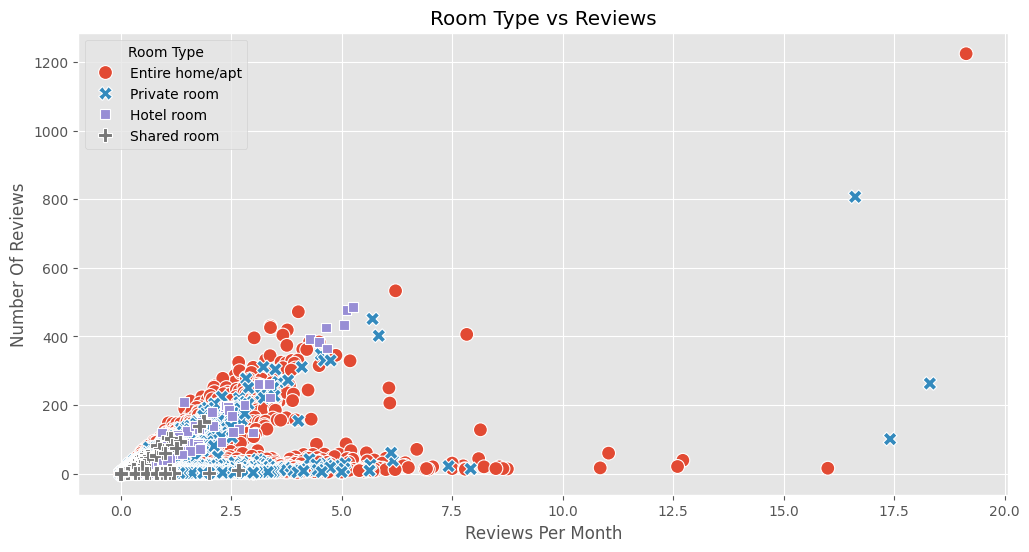

In [227]:
#Scatter Plot between Reviews_per_month vs Number_of_reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(data=new_airbnb, x='reviews_per_month', y='number_of_reviews', hue='room_type', style='room_type', s=100)

#Fitur tambahan
plt.title('Room Type vs Reviews')
plt.xlabel('Reviews Per Month')
plt.ylabel('Number Of Reviews')
plt.legend(title='Room Type')
plt.grid(True)

plt.show()

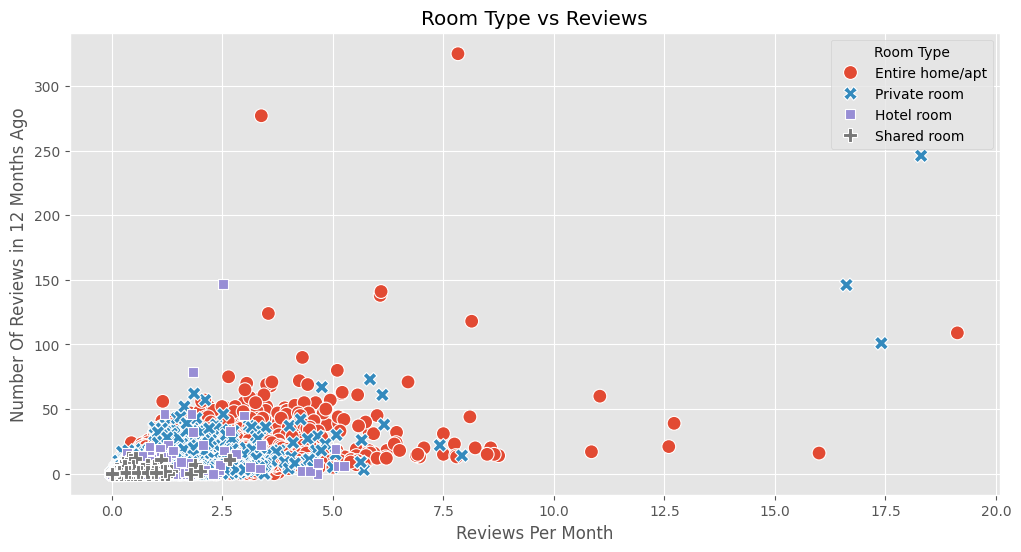

In [228]:
#Scatter Plot between Reviews_per_month vs Number_of_reviews_ltm
plt.figure(figsize=(12, 6))
sns.scatterplot(data=new_airbnb, x='reviews_per_month', y='number_of_reviews_ltm', hue='room_type', style='room_type', s=100)

#Fitur tambahan
plt.title('Room Type vs Reviews')
plt.xlabel('Reviews Per Month')
plt.ylabel('Number Of Reviews in 12 Months Ago')
plt.legend(title='Room Type')
plt.grid(True)

plt.show()

Berdasarkan beberapa boxplot dan scatter plot diatas, sebagian outlier akan kita pertahankan dalam dataset dan sebagian yang lain akan diremove. Data yang diremove adalah data yang punya kriteria sebagai berikut:
- number of reviews > 200
- number of reviews ltm > 60
- reviews per month > 6

In [229]:
#Action - Update data dengan kriteria dibawah
new_airbnb = new_airbnb[new_airbnb['number_of_reviews'] < 200]      #Remove data dari number_of_reviews >200
new_airbnb = new_airbnb[new_airbnb['number_of_reviews_ltm'] < 60]   #Remove data dari number_of_reviews_ltm >60
new_airbnb = new_airbnb[new_airbnb['reviews_per_month'] < 6]        #Remove data dari reviews_per_month >6

#Recheck
new_airbnb.shape

(15128, 16)

##Feature Engineering

Untuk menjawab pertanyaan terkait masalah dalam kasus ini, kita memerlukan suatu parameter (kolom) yang dapat menjadi acuan utama dalam menentukan listing mana yang cenderung disukai dan kurang/tidak disukai oleh tamu (Guest) Airbnb.

Pendekatan yang akan kita gunakan adalah berdasarkan jumlah review pada suatu listing. Pendekatan ini didasari dari fenomena *Self-Selection Bias* dan *J-Shaped Distribution*. Self-selection bias terjadi ketika individu memilih untuk berpartisipasi atau tidak dalam penelitian berdasarkan karakteristik tertentu. Sementara J-shaped distribution adalah pola distribusi yang memiliki bentuk menyerupai huruf "J". Dalam grafiknya terdapat penurunan diawal, diikuti dengan peningkatan yang tajam setelah titik tertentu.

Pada konteks dataset Airbnb ini, Guest yang berpartisipasi memberikan review pada suatu listing adalah guest yang mendapatkan experience sangat memuaskan atau sangat mengecewakan (*Self-selection bias*). Jika menggunakan dataset yang besar, fenomena ini cenderung menunjukkan bahwa review positif akan sangat dominan, sehingga membentuk *J-Shaped Distribution*.

*Sumber:
1. Xinxin Li dan Lorin M. Hitt. (2008). Self-Selection and Information Role of Online Product Reviews. Information Systems Research, Vol. 19 No. 4, pp. 456-474. (https://bit.ly/capstone02mantap)
2. Nan Hu, dkk. (2009). Overcoming the J-shaped Distribution of Product Reviews. Communications of the ACM, Vol. 52 No. 10. (https://bit.ly/capstone02mantap)
3. https://www.widewail.com/blog/local-marketing-insider-037

Kecenderungan listing yang populer dan kurang populer oleh guest akan direpresentasikan oleh enjoyment_score dengan skala 1 hingga 10. Dasar perhitungan skor tersebut berdasarkan rumus berikut:
>enjoyment_score = [33,33%(number_of_reviews_scaled) + 33,33%(reviews_per_month_scaled) + 33,33%(number_of_reviews_ltm_scaled)]*(10)

Keterangan:
1. Self-selection bias mempunyai kelemahan berupa durasi waktu survei yang panjang. Oleh karena itu, selain menggunakan parameter number_of_reviews_ltm yang mencerminkan nilai short-term, kita juga menggunakan parameter number_of_reviews dan reviews_per_month yang bersifat long-term.
2. Sebelum dihitung berdasarkan bobotnya masing-masing, setiap parameter akan discaling menggunakan MinMax_Scaller agar punya rentang nilai yang sama (0 sampai 1). Basically Minmax_scaller itu cenderung sensitif pada outliers, namun karena menimbang 3 parameter tersebut punya distribusi yang sama secara visual yaitu right-skewed, scalling metode ini tetap dipilih.  
3. 2 poin diatas bertujuan meningkatkan accuration dan realibility dalam merepresentasikan listing mana yang cenderung disukai oleh populasi tamu (guest) di Bangkok.

###New Column - `Scaled Columns` (NR_scaled', 'RM_scaled', 'NR12_scaled)

In [230]:
#Funtion perhitungan Scaled Columns
def scaled_column():
    scaler = MinMaxScaler()
    new_airbnb[['NR_scaled', 'RM_scaled', 'NR12_scaled']] = scaler.fit_transform(
        new_airbnb[['number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]
    )
    return new_airbnb

#NEW COLUMNS = Scaled Columns (NR_scaled', 'RM_scaled', 'NR12_scaled')
scaled_column()
new_airbnb.shape

(15128, 19)

###New Column - `Enjoyment Score`

In [231]:
#Function perhitungan enjoyment_score
def calculate_enjoyment_score(row):
    if row['number_of_reviews_ltm'] > 0:
        return ((row['NR_scaled'] *1/3) + (row['RM_scaled'] *1/3) + (row['NR12_scaled'] *1/3)) * 10
    else:
        return 0

#NEW COLUMN = Enjoyment Score
def enjoyment_score():
  new_airbnb['enjoyment_score'] = new_airbnb.apply(calculate_enjoyment_score, axis=1)

enjoyment_score()
new_airbnb.sample(1)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,NR_scaled,RM_scaled,NR12_scaled,enjoyment_score
10347,22574856,"Girls room in old Chinatown ""TALAT PHLU"" Thonburi",165945964,Phachock,Thon buri,13.72046,100.47694,Private room,1600,1,0,2000-01-01,0.0,2,90,0,0.0,0.0,0.0,0.0


In [232]:
#Konsentrasi Enjoyment_score
enjoyment_is0 = new_airbnb[(new_airbnb['enjoyment_score'] == 0)]
enjoyment_up0 = new_airbnb[(new_airbnb['enjoyment_score'] > 0)]
print("Secara enjoyment_score, dataset terdiri dari", enjoyment_up0.shape[0], "data bernilai >0 dan", enjoyment_is0.shape[0], "data bernilai 0")

Secara enjoyment_score, dataset terdiri dari 6408 data bernilai >0 dan 8720 data bernilai 0


In [233]:
#Pengecekan distribusi Enjoyment_score >0
px.histogram(
    new_airbnb,
    x=[new_airbnb[new_airbnb['enjoyment_score'] > 0]['enjoyment_score']],
    nbins=100
)

###New Column - `Popularity Level`

In [234]:
#Function penentuan popularity_level
def level(score):
    if score == 0:
        return 'New/Low'
    elif 0 < score <= 2:
        return 'Emerging'
    elif 2 < score <= 4:
        return 'Moderate'
    elif score > 4:
        return 'Star'

#NEW COLUMN - Popularity Level
new_airbnb['popularity_level'] = new_airbnb['enjoyment_score'].apply(level)
new_airbnb.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,NR_scaled,RM_scaled,NR12_scaled,enjoyment_score,popularity_level
5949,50199142,2BR！New! Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.73529,100.55877,Entire home/apt,7214,1,...,2022-12-04,1.22,228,358,20,0.115578,0.205734,0.338983,2.200982,Moderate
14327,18362819,6 Super Comfy Capsule Beds | Sukhumvit | Bangkok,126601726,Patsiri,Khlong Toei,13.72706,100.57316,Hotel room,1500,1,...,2020-01-25,0.05,15,330,0,0.015075,0.008432,0.000000,0.000000,New/Low
15134,30728097,14 Male Dormitory Room,228535635,Pornchai,Phra Nakhon,13.75925,100.49688,Shared room,550,1,...,2000-01-01,0.00,62,180,0,0.000000,0.000000,0.000000,0.000000,New/Low


##Prepared Data

In [235]:
new_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15128 entries, 0 to 15334
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15128 non-null  int64  
 1   name                            15128 non-null  object 
 2   host_id                         15128 non-null  int64  
 3   host_name                       15128 non-null  object 
 4   neighbourhood                   15128 non-null  object 
 5   latitude                        15128 non-null  float64
 6   longitude                       15128 non-null  float64
 7   room_type                       15128 non-null  object 
 8   price                           15128 non-null  int64  
 9   minimum_nights                  15128 non-null  int64  
 10  number_of_reviews               15128 non-null  int64  
 11  last_review                     15128 non-null  object 
 12  reviews_per_month               15128

Setelah dataset dibersihkan dari outliers dan dimanipulasi nilai NaN-nya, total data yang akan diolah sebanyak 15.128 row data atau sekitar % dari 15.854 data mentah. Disamping itu, terdapat penambahan 5 kolom baru sehingga total kolom saat ini sebanyak 21 kolom. Berikut untuk penjelasan setiap kolom baru tersebut:
1. NR_scaled : hasil scaling dari kolom number_of_reviews. Column ini mempunyai rentang nilai antara 0 hingga 1.
2. RM_scaled : hasil scaling dari kolom reviews_per_month. Column ini mempunyai rentang nilai antara 0 hingga 1.
3. NR12_scaled : hasil scaling dari kolom number_of_reviews_ltm. Nilai pada column ini mempunyai range 0 hingga 1.
4. Enjoyment_score : skor perhitungan tingkat kepuasan guest airbnb pada suatu listing dengan pendekatan berdasarkan number_of_reviews, reviews_per_month, dan number_of_reviews_ltm. Skor pada kolom ini mempunyai range nilai antara 0 hingga 10, dimana semakin mendekati 10 maka listing tersebut dikatakan memberikan pelayanan yang memuaskan bagi guest.  
5. Popularity_level : Kategorisasi listing berdasarkan nilai enjoyment_score kedalam 4 tingkatan yaitu New/Low, Emerging, Moderate, dan Star.

In [236]:
#Download dataset bersih sebagai material utama dalam membuat dashboard tableau
new_airbnb.to_csv('New_airbnb cleaned.csv', index=False)

#ANALYSIS

##Tingkat `Popularity Level` berdasarkan `Room Type`


Setiap listing Airbnb di bangkok dikelompokkan kedalam 4 kategori yaitu Entire Home/Apartemen, Private Room, Hotel Room, dan Shared Room. Informasi itu bisa kita temukan pada kolom `room_type` dalam dataset.

In [237]:
#Overview Jumlah listing by room type
overview_roomtype = new_airbnb[['id', 'room_type']].groupby('room_type', as_index=False).count()
overview_roomtype.rename(columns={'id': 'jumlah'}, inplace=True)

overview_roomtype

,room_type,jumlah
0,Entire home/apt,8436
1,Hotel room,620
2,Private room,5565
3,Shared room,507


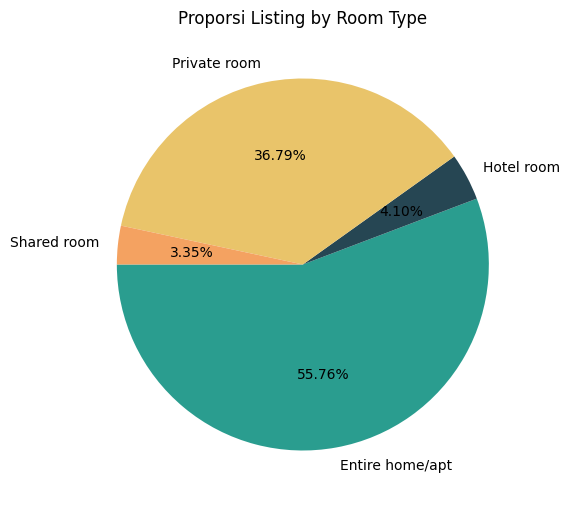

In [238]:
#Proporsi Listing by room type
plt.style.use('ggplot')
plt.figure(figsize=(6, 7))
plt.pie(overview_roomtype['jumlah'],
        labels=overview_roomtype['room_type'],
        autopct='%.2f%%',
        startangle=180,
        colors = ['#2A9D8F', '#264653', '#E9C46A', '#F4A261', '#E76F51'] #Colour pallate "Ocean Breeze"
       )
plt.title('Proporsi Listing by Room Type', size=12)
plt.show()

In [239]:
#Overview Jumlah listing by room type
overview_popularity = new_airbnb[['id', 'popularity_level']].groupby('popularity_level', as_index=False).count()
overview_popularity.rename(columns={'id': 'jumlah'}, inplace=True)

overview_popularity

,popularity_level,jumlah
0,Emerging,4792
1,Moderate,1238
2,New/Low,8720
3,Star,378


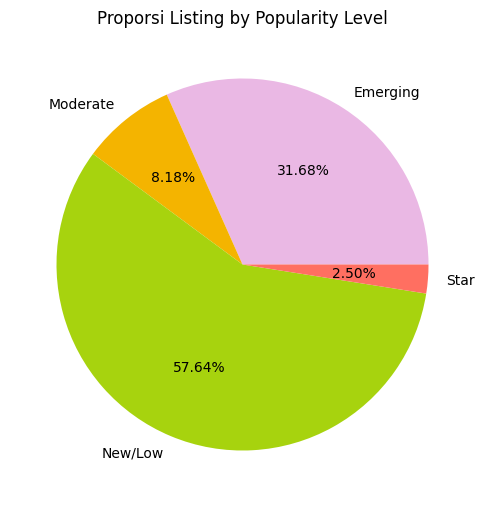

In [240]:
#Proporsi Listing by Popularity Level
plt.style.use('ggplot')
plt.figure(figsize=(6, 7))
plt.pie(overview_popularity['jumlah'],
        labels=overview_popularity['popularity_level'],
        autopct='%.2f%%',
        startangle=0,
        colors = ['#EAB8E4', '#F4B400', '#A7D30E', '#FF6F61', '#6A4C93'] #Colour pallate "Tropical Blossom"
       )
plt.title('Proporsi Listing by Popularity Level', size=12)
plt.show()

In [241]:
#Jumlah listing berdasarkan room_type dan popularity_level
ct_roomtype=pd.crosstab(new_airbnb['room_type'],new_airbnb['popularity_level'])
ct_roomtype['Total']=ct_roomtype.sum(axis=1)
ct_roomtype.sort_values('Total',ascending=False).head(10)

popularity_level,Emerging,Moderate,New/Low,Star,Total
room_type,,,,,
Entire home/apt,3389,1009,3725,313,8436
Private room,1192,203,4117,53,5565
Hotel room,141,22,446,11,620
Shared room,70,4,432,1,507


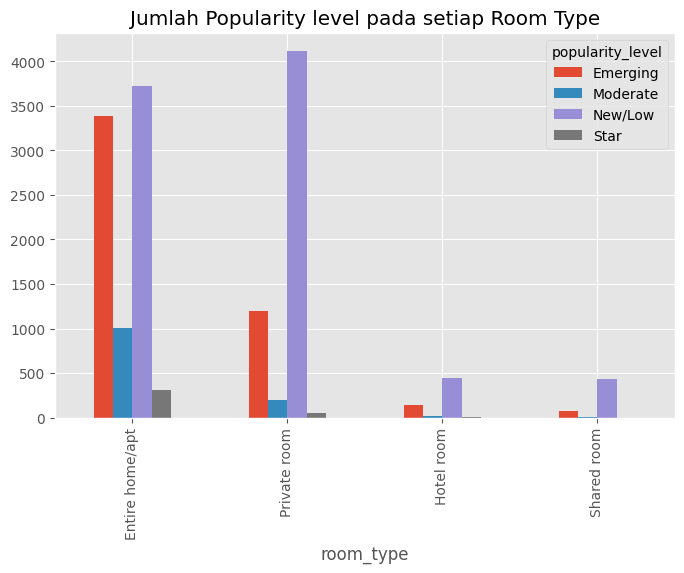

In [242]:
ct_roomtype.sort_values('Star',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5),
title='Jumlah Popularity level pada setiap Room Type')
plt.show()

<Figure size 10000x400 with 0 Axes>

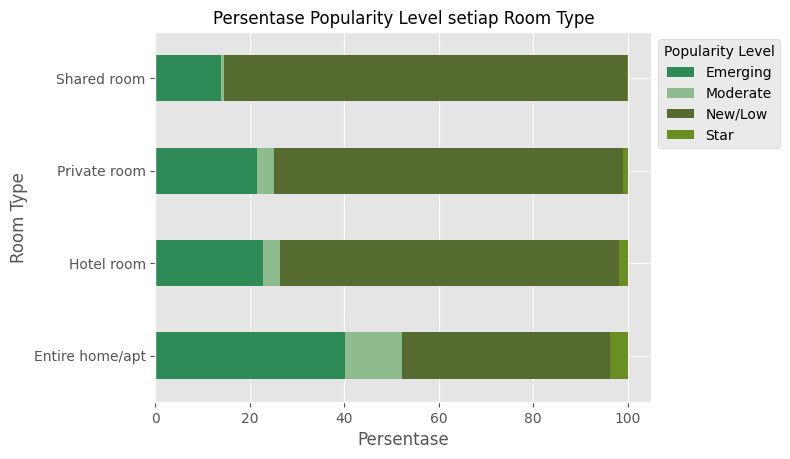

In [243]:
#Persentase setiap popularity_level
ct_roomtype_percent = ct_roomtype.div(ct_roomtype['Total'], axis=0) * 100

#Colour pallate warna
pilih_warna1 = ['#2E8B57', '#8FBC8F', '#556B2F', '#6B8E23', '#9ACD32'] #colour pallate "Bukit Barisan"

#Buat Grafik Stacked bar
plt.figure(figsize=(100, 4))
ct_roomtype_percent.drop(columns='Total').plot(kind='barh', stacked=True, color=pilih_warna1)

#Edit Grafik
plt.xlabel('Persentase')
plt.ylabel('Room Type')
plt.legend(title='Popularity Level', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Persentase Popularity Level setiap Room Type', size=12)
plt.show()

Berdasarkan analisis dari dua grafik pie chart dan dua grafik stacked bar, dapat disimpulkan hal-hal berikut:

1. Distribusi Tipe Room:
   - Jumlah listing Airbnb di Bangkok yang paling banyak adalah Entire Home/Apartemen, dengan total 8436 unit atau 55,76% dari total listing. Tipe ini diikuti oleh Private Room sebanyak 5565 unit (36,79%), Hotel Room sebanyak 620 unit (4,10%), dan terakhir Shared Room sebanyak 507 unit (3,35%).
2. Tingkat Kepuasan Tamu:
   - Dari total listing yang terdaftar di Airbnb per Desember 2022, hanya 378 unit (2,5%) yang termasuk dalam kategori sangat disukai oleh tamu. Ini diikuti oleh kategori Moderate (8,18%), Emerging (31,68%), dan New/Low (57,64%).
3. Popularitas Tipe Room:
   - Level Star dan Moderate merupakan dua level teratas pada popularity level yang lebih banyak ditemukan pada Entire Home/Apartemen, diikuti oleh Private Room, Hotel Room, dan Shared Room. Urutan ini menunjukkan korelasi positif dengan jumlah total listing pada masing-masing tipe room.
4. Persentase Tingkat Kepuasan:
   - Meskipun Entire Home adalah tipe yang paling banyak, tipe ini memiliki persentase tingkat kepuasan yang lebih tinggi dibandingkan tipe lainnya, terlihat dari tingkat Star yang jauh lebih tinggi. Sebaliknya, Shared Room memiliki tingkat Star paling sedikit dan proporsi New/Low paling banyak.
   - Untuk Private Room dan Hotel Room, persentase tingkat kepuasan pada kedua tipe ini bersaing dan tidak menunjukkan perbedaan signifikan.

- Langkah Selanjutnya
   - Berdasarkan hasil analisis visualisasi di atas, kita akan melanjutkan dengan pengujian statistik terhadap nilai enjoyment_score antara Entire Home dengan Hotel Room yang mewakili 2 type yang dari visualisasi terlihat jelas lebih rendah secara proporsi popularity_level.
   - Popularity_level adalah bentuk dari kategorisasi berdasarkan enjoyment_score, sehingga dalam pengujian statistika nanti kita akan menggunakan nilai enjoyment_score sehingga lebih valid.
   - Pertanyaan yang akan dijawab yaitu:
   `Apakah tipe Entire Home/Apartemen signifikan lebih disukai oleh tamu dibandingkan tipe Shared Room?`



Asumsi Uji Hypothesis Null
- H0 = Tipe Entire Home/Apt dan Shared Room mempunyai mean enjoyment_score yang sama atau tidak signifikan berbeda
- H1 = Entire Home/Apt mempunyai mean enjoyment_score yang signifikan lebih besar dibanding Shared room

In [244]:
#Uji Kenormalan distribusi kolom Enjoyment_score
from statsmodels.stats.diagnostic import lilliefors #Lilliefors salah satu paling kuat, karena shapiro wilk tidak akurat N>5000

#Uji Lilliefors
stat, pval = lilliefors(new_airbnb['enjoyment_score'])
if pval <= 0.05:
    print('Tolak H0, data terdistribusi tidak normal.')
else:
    print('Terima H0, data terdistribusi normal.')

Tolak H0, data terdistribusi tidak normal.


In [245]:
#Panggil Data Uji
tesh0_entire = new_airbnb[new_airbnb['room_type'] == 'Entire home/apt']['enjoyment_score']
tesh0_hotel = new_airbnb[new_airbnb['room_type'] == 'Hotel room']['enjoyment_score']

#Distribusi tidak normal dan terdapat Double sample independent = Mann Whitney Method
from scipy.stats import mannwhitneyu

#Hitung Mann Whitney
stat, p_value = mannwhitneyu(tesh0_entire, tesh0_hotel, alternative = 'greater')  #enjoyment score Entire is greater than Hotel

print(f"U-Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

#Hasil Test
alpha = 0.05
if p_value < alpha:
    print("Tolak H0 dan menerima H1. Mean Enjoyment Score type Entire Home lebih tinggi secara signifikan dibanding type Hotel Room")
else:
    print("Gagal menolak H0. Mean Enjoyment Score type Entire Home sama atau tidak signifikan berbeda dibanding type Hotel Room")

U-Statistic: 3455313.00
P-Value: 0.0000
Tolak H0 dan menerima H1. Mean Enjoyment Score type Entire Home lebih tinggi secara signifikan dibanding type Hotel Room


Berdasarkan uji hipotesis nol di atas, dapat disimpulkan bahwa mean enjoyment score untuk tipe Entire Home/Apartemen secara signifikan lebih tinggi dibandingkan dengan tipe Hotel Room. Temuan ini sekaligus menunjukkan bahwa, selain menjadi type dengan jumlah listing yang disukai paling banyak, Entire Home juga merupakan tipe dengan tingkat kepuasan tamu yang tertinggi secara persentase jika dibandingkan dengan 3 tipe lainnya secara signifikan.

##Tingkat `Popularity Level` berdasarkan `Price`

Harga sewa per malam pada setiap listing diinformasikan dalam dataset pada kolom `Price`.

In [246]:
#Overview Jumlah listing by room type
overview_price = new_airbnb.groupby('room_type')['price'].median().reset_index()
overview_price.rename(columns={'price': 'Median Price'}, inplace=True)  #biar bagus nama kolomnya
overview_price['Median Price'] = overview_price['Median Price'].round(1)  #dibulatin biar 1belakang koma

overview_price

,room_type,Median Price
0,Entire home/apt,1550.5
1,Hotel room,1690.5
2,Private room,1214.0
3,Shared room,500.0


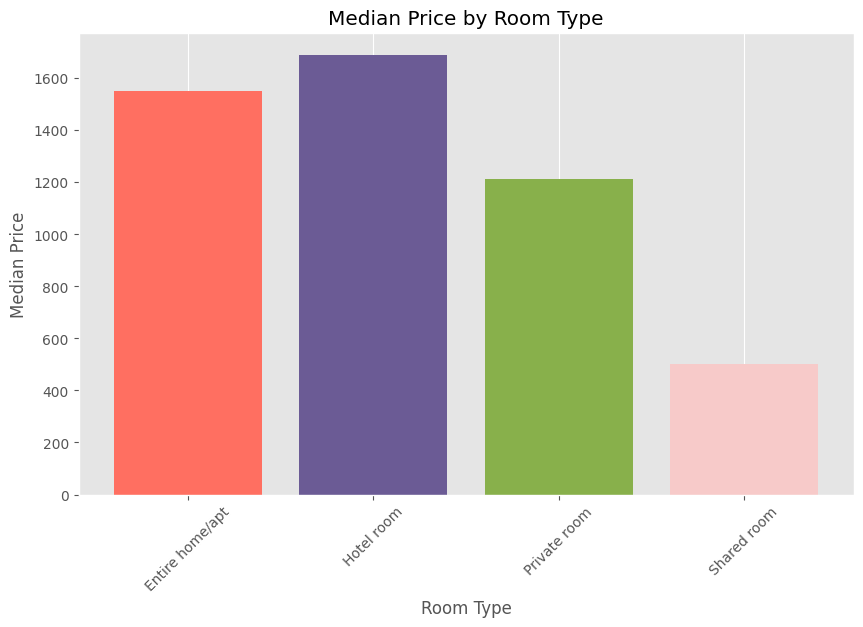

In [247]:
#Overview Price - Barchart
plt.figure(figsize=(10, 6))
plt.bar(overview_price['room_type'], overview_price['Median Price'], color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1'])  # Ganti 'colors' dengan 'color'
plt.title('Median Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tampilkan

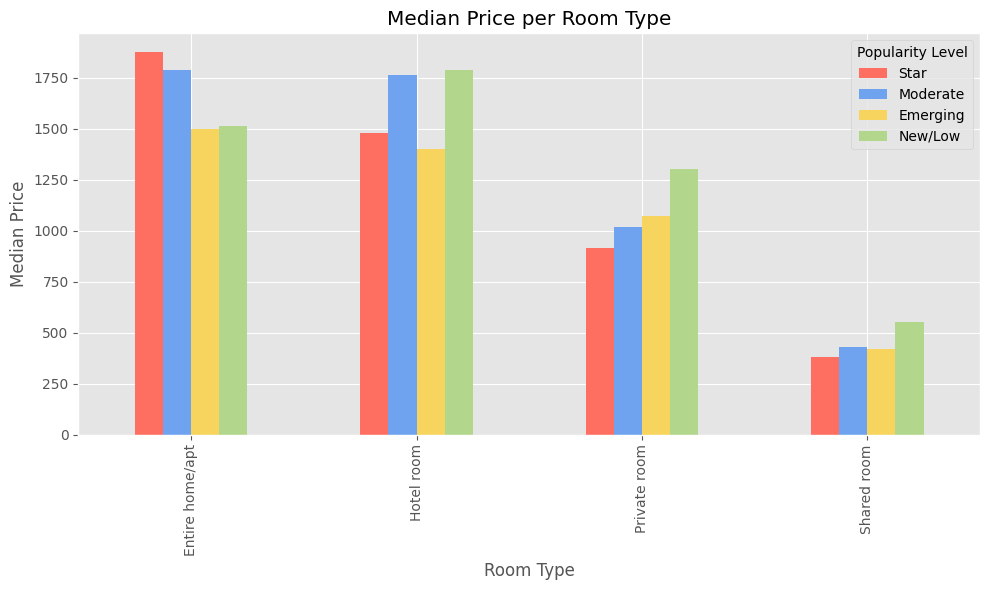

In [248]:
#Median Price by room type dan popularity level
median_prices = new_airbnb.groupby(['room_type', 'popularity_level'])['price'].median().unstack()
urutan_benar = ['Star', 'Moderate', 'Emerging', 'New/Low']
median_prices = median_prices.reindex(columns=urutan_benar)

#Colour pallate warna
pilih_warna2 = ['#FF6F61', '#6FA3EF', '#F7D45D', '#B2D68B'] #colour pallate "Burung Cendrawasih"

#Barplot
median_prices.plot(kind='bar', figsize=(10, 6), color=pilih_warna2)

#Setting Grafik
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.title('Median Price per Room Type')
plt.legend(title='Popularity Level')

#Tampilkan grafik
plt.tight_layout()
plt.show()

Analis terhadap beberapa 2 grafik diatas:
1. Secara Median price, hotel rome cenderung lebih mahal dibanding 3 type yang lainnya namun tidak begitu signifikan jika dibandingkan dengan type entire home.Sedangkan Shared room, median price cenderung jauh lebih rendah.
2. Berdasarkan tingkat kepopulerannya dikalangan tamu, harga listing yang disukai oleh tamu/guest baik itu level star maupun moderate cenderung jauh signifikan lebih mahal dibandingkan listing entire home dengan level emerging dan New/low.
3. Pada private room dan shared room, hal itu cenderung berbalik. Harga untuk listing yang disukai oleh guest baik star dan moderate cenderung lebih murah dibandingkan level new/low maupun emerging. Adapun pada hotel room, tidak ada pola yang signifikan.
4. Hal ini dapat disimpulkan bahwa secara harga, guest yang menggunakan entire home tidak terlalu sensitif dengan kemahalan harga, namun berbanding terbalik dengan pengguna private room dan shared room.

##Tingkat `Popularity Level` berdasarkan `Distrik`

Listing Airbnb tersebar di 50 distrik atau area di kota Bangkok. Informasi terkait distrik tersebut dapat kita temukan pada kolom `neighbourhood`.

In [249]:
#Top10 Distrik berdasarkan count total listing
ct_area=pd.crosstab(new_airbnb['neighbourhood'],new_airbnb['popularity_level'])
ct_area['Total']=ct_area.sum(axis=1)
top10_area_total = ct_area.sort_values('Total',ascending=False).head(10)
top10_area_total

popularity_level,Emerging,Moderate,New/Low,Star,Total
neighbourhood,,,,,
Vadhana,720,240,1019,80,2059
Khlong Toei,843,293,761,102,1999
Huai Khwang,311,66,690,11,1078
Ratchathewi,370,114,562,32,1078
Bang Rak,261,58,435,28,782
Sathon,306,88,344,15,753
Phra Nakhon,145,45,404,15,609
Phra Khanong,186,26,320,0,532
Chatu Chak,122,29,355,8,514


In [250]:
#Top10 Distrik berdasarkan jumlah Listing Star terbanyak
ct_area=pd.crosstab(new_airbnb['neighbourhood'],new_airbnb['popularity_level'])
ct_area['Total']=ct_area.sum(axis=1)
top10_area_star = ct_area.sort_values('Star',ascending=False).head(10)
top10_area_star

popularity_level,Emerging,Moderate,New/Low,Star,Total
neighbourhood,,,,,
Khlong Toei,843,293,761,102,1999
Vadhana,720,240,1019,80,2059
Ratchathewi,370,114,562,32,1078
Bang Rak,261,58,435,28,782
Phaya Thai,100,30,250,22,402
Phra Nakhon,145,45,404,15,609
Sathon,306,88,344,15,753
Parthum Wan,172,43,207,12,434
Huai Khwang,311,66,690,11,1078


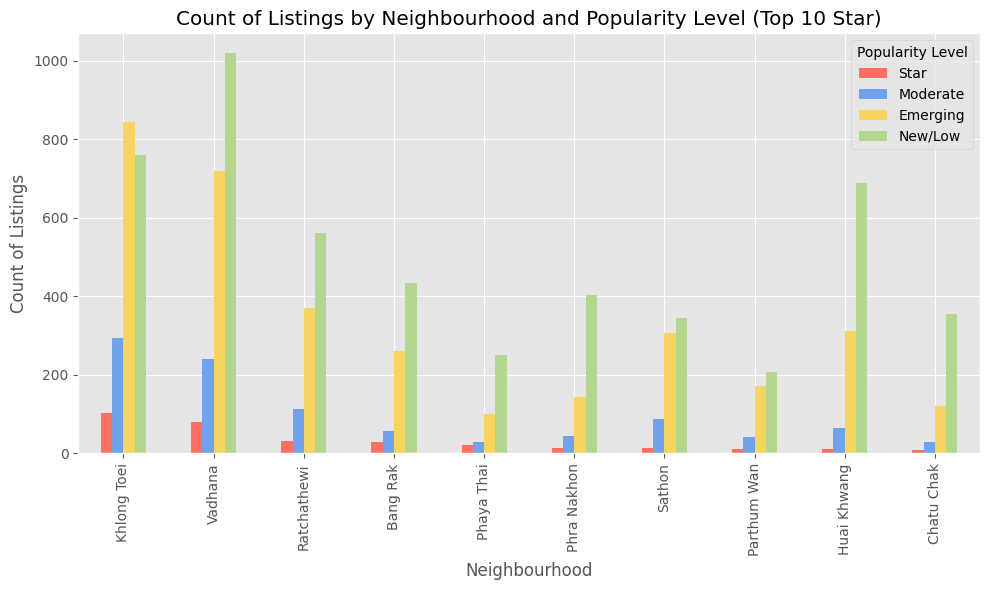

In [251]:
#Count Area by room type dan popularity level
area_count = new_airbnb.groupby(['neighbourhood', 'popularity_level']).size().unstack(fill_value=0)
urutan_benar = ['Star', 'Moderate', 'Emerging', 'New/Low']
area_count = area_count.reindex(columns=urutan_benar)

grafik_to10area = area_count.sort_values(by="Star",ascending=False).head(10)

# Pilih palet warna
pilih_warna2 = ['#FF6F61', '#6FA3EF', '#F7D45D', '#B2D68B']  #Colour pallate = ""

#Barplot
grafik_to10area.plot(kind='bar', figsize=(10, 6), color=pilih_warna2)

# Pengaturan grafik
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Listings')
plt.title('Count of Listings by Neighbourhood and Popularity Level (Top 10 Star)')
plt.legend(title='Popularity Level')

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [252]:
#Top10 Distrik berdasarkan count total listing
mean_enjoyment = new_airbnb.groupby('neighbourhood')['enjoyment_score'].mean().reset_index()
top10_area_enjoyment = mean_enjoyment.sort_values(by="enjoyment_score",ascending=False).head(10)

top10_area_enjoyment

,neighbourhood,enjoyment_score
22,Khlong Toei,1.051647
47,Vadhana,0.815202
41,Sathon,0.787201
29,Parthum Wan,0.735528
31,Phaya Thai,0.719021
37,Ratchathewi,0.716472
34,Pom Prap Sattru Phai,0.665802
45,Thon buri,0.641928
8,Bang Rak,0.636917
9,Bang Sue,0.630998


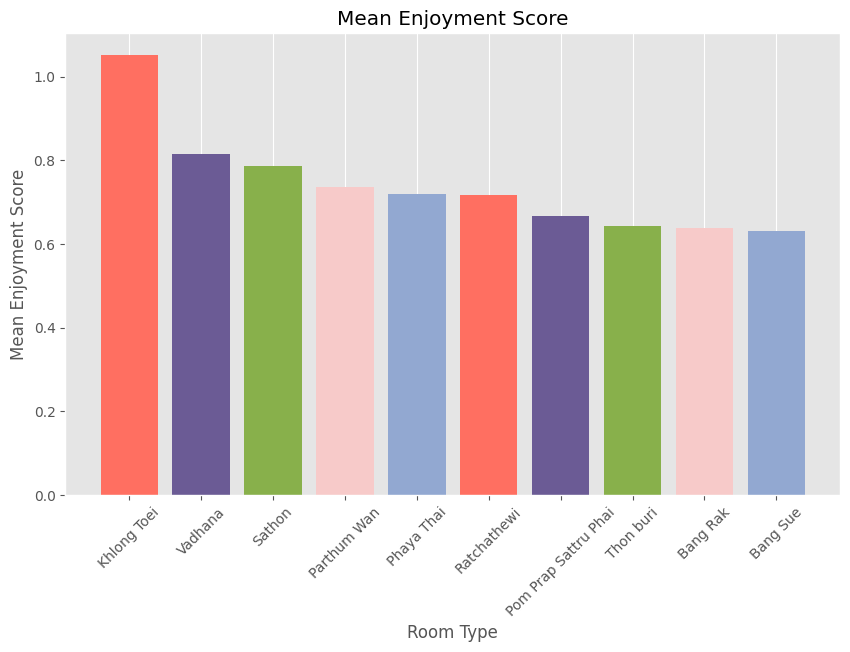

In [253]:
#Overview Area - Barplot
plt.figure(figsize=(10, 6))
plt.bar(top10_area_enjoyment['neighbourhood'], top10_area_enjoyment['enjoyment_score'], color=['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1'])  # Ganti 'colors' dengan 'color'
plt.title('Mean Enjoyment Score')
plt.xlabel('Room Type')
plt.ylabel('Mean Enjoyment Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Tampilkan

Berdasarkan beberapa tabel diatas, berikut beberapa poin analisa:
1. Distrik yang paling banyak secara jumlah dan paling disukai oleh guest/tamu secara konsisten adalah distrik Khlong Toei dan Vadhana. Salah satu alasan utama kenapa area ini menjadi favorit adalah aksesibilitasnya terhadap transportasi umum di kota bangkok yaitu BTS (Skytrain) dan MRT sangat mudah*.

2. Distrik lain yang jumlah listingnya tergolong banyak (top10) dan juga populer (top10) meski tidak sepopuler 2 sebelumnya itu ada Ratchathewi, Bang Rak, Sathon, dan Parthum Wan.

*Sumber:
https://travelhappy.info/bangkok-bts-and-mrt-map/

##Tingkat `Popularity Level` berdasarkan `Avaiability_365`

In [254]:
new_airbnb.groupby(['room_type', 'popularity_level'])['availability_365'].median().unstack()

popularity_level,Emerging,Moderate,New/Low,Star
room_type,,,,
Entire home/apt,246.0,176.0,271.0,159.0
Hotel room,339.0,341.0,348.5,350.0
Private room,331.0,315.0,355.0,291.0
Shared room,348.0,336.5,358.0,359.0


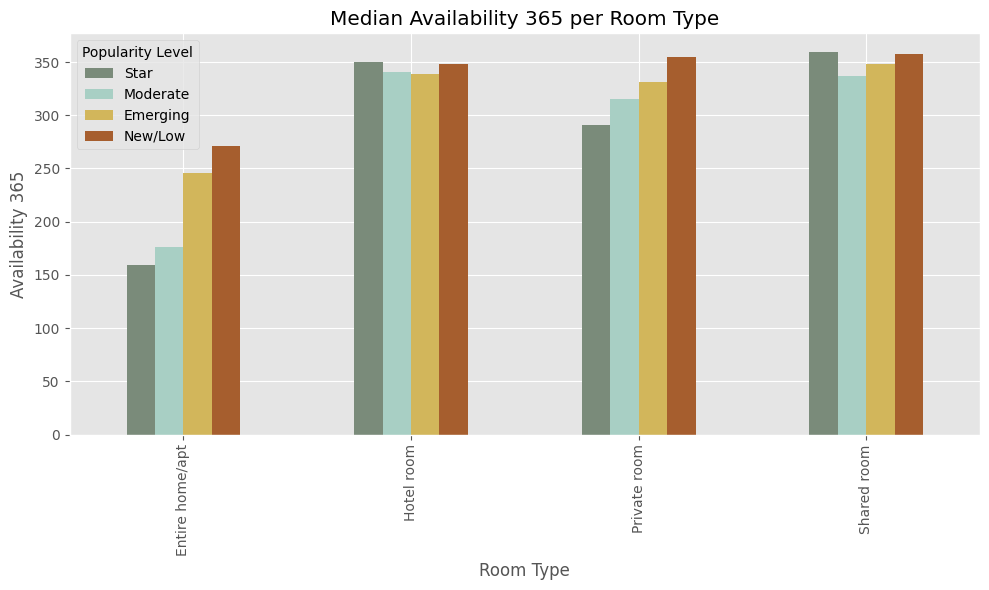

In [255]:
#Median Availability by room type dan popularity level
median_avail = new_airbnb.groupby(['room_type', 'popularity_level'])['availability_365'].median().unstack()
median_avail = median_avail.reindex(columns=urutan_benar)

#Colour pallate warna
pilih_warna3 = ['#7A8B7A', '#A8CFC4', '#D2B65B', '#A65E2E'] #colour pallate "Komodo"

#Barplot
median_avail.plot(kind='bar', figsize=(10, 6), color=pilih_warna3)

#Setting Grafik
plt.xlabel('Room Type')
plt.ylabel('Availability 365')
plt.title('Median Availability 365 per Room Type')
plt.legend(title='Popularity Level')
plt.legend(title='Popularity Level', loc='best')

#Tampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan tabel diatas disimpulkan bahwa:
1. Pada grafik diatas dapat diketahui bahwa Entire home/apartement cenderung mempunyai tingkat availability yang rendah jika dibandingkan 3 type room yang lain. Hal ini berkaitan dengan entire home yang cenderung disewa lebih lama dibanding 3 type yang lain.

2. Pada hotel room dan shared room tidak terlalu membentuk pola yang signifikan antar popularity level terhadap tingkat availability. Sedangkan pada entire home dan private home, terdapat pola yang menunjukkan bahwa adanya korelasi antara tingkat availability dengan tingkat popularitas suatu listing. Semakin tinggi popularitas suatu listing, maka tingkat availability suatu listing akan semakin rendah.

##Tingkat `Popularity Level` berdasarkan `Jumlah Listing per host`

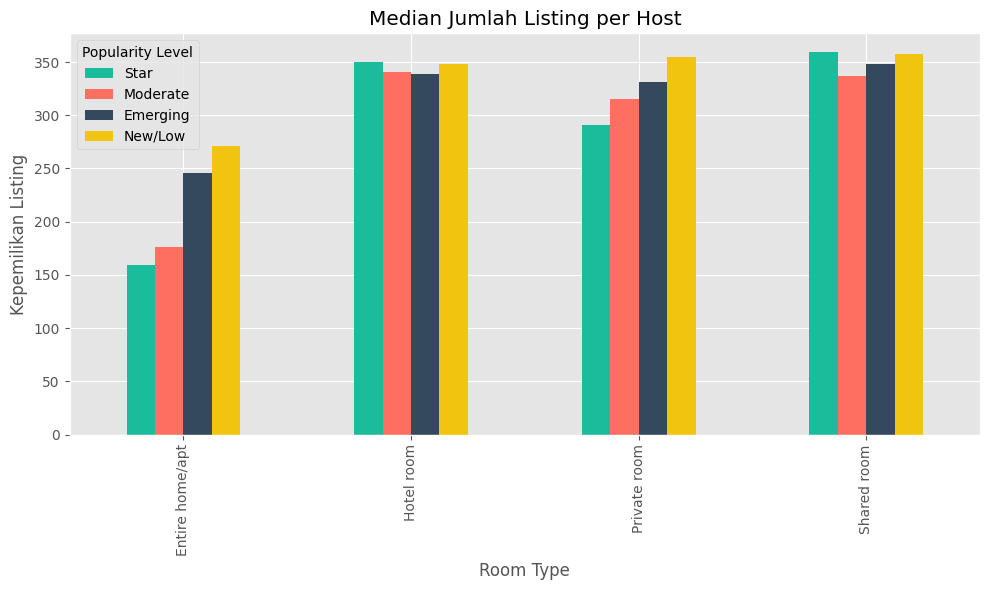

In [257]:
#Median Jumlah listing per host by room type dan popularity level
median_calcu = new_airbnb.groupby(['room_type', 'popularity_level'])['calculated_host_listings_count'].median().unstack()
median_calcu = median_avail.reindex(columns=urutan_benar)

#Colour pallate warna
pilih_warna3 = ['#1ABC9C', '#FF6F61', '#34495E', '#F1C40F'] #colour pallate "Komodo"

#Barplot
median_calcu.plot(kind='bar', figsize=(10, 6), color=pilih_warna3)

#Setting Grafik
plt.xlabel('Room Type')
plt.ylabel('Kepemilikan Listing')
plt.title('Median Jumlah Listing per Host')
plt.legend(title='Popularity Level')
plt.legend(title='Popularity Level', loc='best')

#Tampilkan grafik
plt.tight_layout()
plt.show()

# Kesimpulan dan Rekomendasi

##Kesimpulan

Karakteristik listing yang disukai oleh guest yaitu:
1. Berdasarkan typenya, guest/tamu cenderung menyukai type room berupa Entire Home/Apt.
2. Berdasarkan harga, guest/tamu cenderung menyukai atau puas dengan listing yang punya harga yang cenderung lebih mahal pada type room entire home/apt. Sedangkan pada type Shared room dan private room, berlaku sebaliknya. Adapun pada hotel room, tidak ada pola tertentu. Hal ini menunjukkan bahwa guest type entire home tidak sensitif harga, sedangkan guest pada private dan shared room cenderung sensitif terhadap harga.
3. Berdasarkan availability. Entire home/apartement cenderung mempunyai tingkat availability yang rendah jika dibandingkan 3 type room yang lain. Hal ini berkaitan dengan entire home yang cenderung disewa lebih lama dibanding 3 type yang lain. Adapun jika dibandingkan dengan tingkat kepopulerannya, hotel room dan shared room tidak terlalu membentuk pola yang signifikan antar popularity level terhadap tingkat availability. Sedangkan pada entire home dan private home, terdapat pola yang menunjukkan bahwa adanya korelasi antara tingkat availability dengan tingkat popularitas suatu listing. Semakin tinggi popularitas suatu listing, maka tingkat availability suatu listing akan semakin rendah.

4. Berdasarkan areanya, Distrik yang paling banyak secara jumlah dan paling disukai oleh guest/tamu secara konsisten adalah distrik Khlong Toei dan Vadhana. Salah satu alasan utama kenapa area ini menjadi favorit adalah aksesibilitasnya terhadap transportasi umum di kota bangkok yaitu BTS (Skytrain) dan MRT sangat mudah*.

Adapun Distrik lain yang jumlah listingnya tergolong banyak (top10) dan juga populer (top10) meski tidak sepopuler 2 sebelumnya itu ada Ratchathewi, Bang Rak, Sathon, dan Parthum Wan.

5. Berdasarkan jumlah kepemilikan listing per host, pada type entire home terdapat pola dimana semakin sedikit host mempunyai listing maka kecenderungan level popularitasnya tinggi. Hal itu tidak terjadi pada 3 type room yang lain.